In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
import tqdm 

In [5]:
import pandas as pd 
data = pd.read_html('https://developers.google.com/public-data/docs/canonical/countries_csv')

In [8]:
all_countries = data[0]

In [9]:
all_countries

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


In [19]:
all_countries.dropna(inplace=True)

In [20]:
all_countries

,country,latitude,longitude,name
0,AD,42.546245,1.601554,Andorra
1,AE,23.424076,53.847818,United Arab Emirates
2,AF,33.939110,67.709953,Afghanistan
3,AG,17.060816,-61.796428,Antigua and Barbuda
4,AI,18.220554,-63.068615,Anguilla
...,...,...,...,...
240,YE,15.552727,48.516388,Yemen
241,YT,-12.827500,45.166244,Mayotte
242,ZA,-30.559482,22.937506,South Africa
243,ZM,-13.133897,27.849332,Zambia


<function matplotlib.pyplot.show(close=None, block=None)>

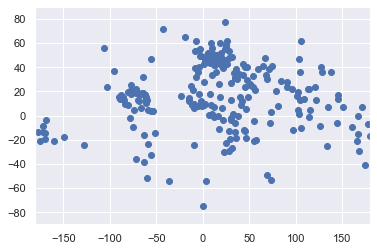

In [21]:
plt.scatter(all_countries['longitude'],all_countries['latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

### Clustering based on geographic location

In [22]:
x=all_countries.iloc[:,1:3]

In [23]:
x

,latitude,longitude
0,42.546245,1.601554
1,23.424076,53.847818
2,33.939110,67.709953
3,17.060816,-61.796428
4,18.220554,-63.068615
...,...,...
240,15.552727,48.516388
241,-12.827500,45.166244
242,-30.559482,22.937506
243,-13.133897,27.849332


In [66]:
wcss=[]

for i in tqdm.tqdm(range(1,11)):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 10.41it/s]


In [67]:
wcss

[1505807.9456476038,
 699374.3669501361,
 352189.702375235,
 270854.7454227924,
 198971.38059612675,
 157506.46592253327,
 128943.9856039248,
 104696.56886983904,
 86683.15999528169,
 79468.61922093236]

Text(0, 0.5, 'Within-cluster Sum of Squares')

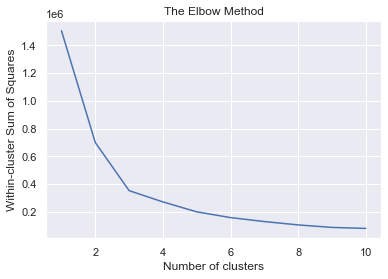

In [69]:
number_clusters = range(1,11)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster Sum of Squares')


In [47]:
kmeans=KMeans(4)

In [48]:
kmeans.fit(x)

KMeans(n_clusters=4)

In [49]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 3, 3, 0, 0, 3, 0, 0, 3, 1, 0, 2, 3, 0, 0, 3, 2, 0, 0, 0,
       0, 0, 0, 3, 2, 3, 3, 3, 2, 0, 0, 0, 3, 3, 2, 0, 0, 0, 0, 0, 1, 3,
       0, 2, 3, 3, 3, 3, 2, 0, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 0,
       0, 2, 3, 2, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 3, 0, 0, 3, 0, 0, 3, 3,
       2, 0, 3, 0, 2, 2, 3, 0, 3, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 3,
       0, 2, 0, 0, 2, 1, 0, 3, 2, 2, 0, 3, 0, 2, 0, 3, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 2, 3, 0, 3, 0, 0, 2, 0, 3,
       2, 0, 2, 0, 2, 0, 3, 0, 0, 2, 2, 1, 2, 0, 3, 3, 1, 2, 2, 0, 0, 3,
       1, 3, 0, 0, 2, 3, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 3, 0, 0, 3, 0, 2, 0, 2, 0, 1, 2, 0, 0, 1, 0, 3,
       2, 2, 0, 0, 0, 3, 3, 0, 0, 3, 3, 3, 3, 2, 2, 1, 1, 0, 0, 0, 0, 0,
       0])

In [50]:
data_with_clusters=all_countries.copy()
data_with_clusters['cluster']= identified_clusters
data_with_clusters

,country,latitude,longitude,name,cluster
0,AD,42.546245,1.601554,Andorra,0
1,AE,23.424076,53.847818,United Arab Emirates,0
2,AF,33.939110,67.709953,Afghanistan,0
3,AG,17.060816,-61.796428,Antigua and Barbuda,3
4,AI,18.220554,-63.068615,Anguilla,3
...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,0
241,YT,-12.827500,45.166244,Mayotte,0
242,ZA,-30.559482,22.937506,South Africa,0
243,ZM,-13.133897,27.849332,Zambia,0


<function matplotlib.pyplot.show(close=None, block=None)>

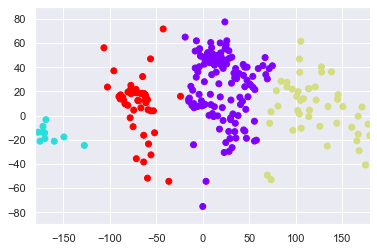

In [51]:
plt.scatter(all_countries['longitude'],all_countries['latitude'],c=data_with_clusters['cluster'],cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show